RNN Tutorial for Beginners | Recurrent Neural Network | RNN In Deep Learning | Simplilearn

https://www.youtube.com/watch?v=6BIwspqL_Cs

# Sentiment Analysis using RNN

In [6]:
# pip install wordcloud

In [7]:
# pip install nltk

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

NLTK - Natural Language ToolKit

word_tokenize - It is a function in Python that splits a given sentence into words using the NLTK library

TfidVectorizer - It converts a collection of raw documents into a matrix of TF or IDF features

fastText or word2vec word embedding python implementation

Confusion Matrix - It is a table that is used to define the performance of a classification algorithm

LogisticRegression - It estimates the probability of an event occuring such as voted or didn't vote based on the given dataset of the independent variable

SVC - It is an algorithm that attempts to find a hyperplane to maximize the distance between classified samples

RandomForestClassifier - It creates a set of decision trees from a randomly selected subset of the training set

BernoulliNB - It is a part of the Naive Bayes family, it is based on Bernoulli distribution and accept only binary values i.e., 0 or 1

pickle - It is primarily used in serializing and de-serializing a python objective structure

In [44]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin', names=['polarity', 'id', 'date', 'query', 'user', 'text'])

In [45]:
data = data.sample(frac = 1)
# data = data[:200000]
data = data[:500]

In [46]:
print('Dataset shape:', data.shape)

Dataset shape: (500, 6)


In [47]:
data.head(10)

polarity          id                          date     query  \
1040522         4  1956963525  Thu May 28 23:08:38 PDT 2009  NO_QUERY   
1167514         4  1980062217  Sun May 31 05:33:00 PDT 2009  NO_QUERY   
1387724         4  2052956768  Sat Jun 06 02:41:54 PDT 2009  NO_QUERY   
742220          0  2266484668  Sun Jun 21 08:35:19 PDT 2009  NO_QUERY   
363222          0  2047767126  Fri Jun 05 14:08:57 PDT 2009  NO_QUERY   
49191           0  1678081020  Sat May 02 05:24:51 PDT 2009  NO_QUERY   
410342          0  2059853094  Sat Jun 06 17:46:06 PDT 2009  NO_QUERY   
1068708         4  1965788120  Fri May 29 16:32:38 PDT 2009  NO_QUERY   
1047412         4  1957763386  Fri May 29 01:32:03 PDT 2009  NO_QUERY   
441047          0  2066902831  Sun Jun 07 11:23:06 PDT 2009  NO_QUERY   

                    user                                               text  
1040522     Beazacamille                      hot chocolate is truly great   
1167514        YaelBeeri              @kfirpravda no mac, me thinkpad girl   
1387724    andychapman09  Ooooh I love working in sales sometimes- had a...  
742220   teamoferforever  at ihop waiting to be called..we're #63..they'...  
363222            bigjim                      @berial yep, down for me too   
49191            Samie_g  Loser. Im cold.  i don't like to be awake this...  
410342         IAMRASHON                                     I MISS MY SON   
1068708     karissababy4  Just got back from River Watch and the water c...  
1047412    xyumxyumxyumx  spent a good night in Cardiff last night. Off ...  
441047     SayraOatcakes  I want to go to Sloans to watch the Apprentice...

In [48]:
# 0 means negative
# 4 means positive

data['polarity'].unique()

array([4, 0], dtype=int64)

In [49]:
data['polarity'] = data['polarity'].replace(4,1)
data.head()

polarity          id                          date     query  \
1040522         1  1956963525  Thu May 28 23:08:38 PDT 2009  NO_QUERY   
1167514         1  1980062217  Sun May 31 05:33:00 PDT 2009  NO_QUERY   
1387724         1  2052956768  Sat Jun 06 02:41:54 PDT 2009  NO_QUERY   
742220          0  2266484668  Sun Jun 21 08:35:19 PDT 2009  NO_QUERY   
363222          0  2047767126  Fri Jun 05 14:08:57 PDT 2009  NO_QUERY   

                    user                                               text  
1040522     Beazacamille                      hot chocolate is truly great   
1167514        YaelBeeri              @kfirpravda no mac, me thinkpad girl   
1387724    andychapman09  Ooooh I love working in sales sometimes- had a...  
742220   teamoferforever  at ihop waiting to be called..we're #63..they'...  
363222            bigjim                      @berial yep, down for me too

In [50]:
data.describe()

polarity            id
count  500.000000  5.000000e+02
mean     0.470000  1.984911e+09
std      0.499599  2.052964e+08
min      0.000000  1.467864e+09
25%      0.000000  1.881741e+09
50%      0.000000  2.001872e+09
75%      1.000000  2.071961e+09
max      1.000000  2.328641e+09

In [51]:
positives = data['polarity'][data.polarity == 1]
negatives = data['polarity'][data.polarity == 0]

print('Total length of the data is: {}', format(data.shape[0]))
print('no of positive tagged sent: {}', format(len(positives)))
print('no of negatives tagged sent: {}', format(len(negatives)))

Total length of the data is: {} 500
no of positive tagged sent: {} 235
no of negatives tagged sent: {} 265


Word count distribution for both positive and negative

In [52]:
def word_count(words):
    return len(words.split())

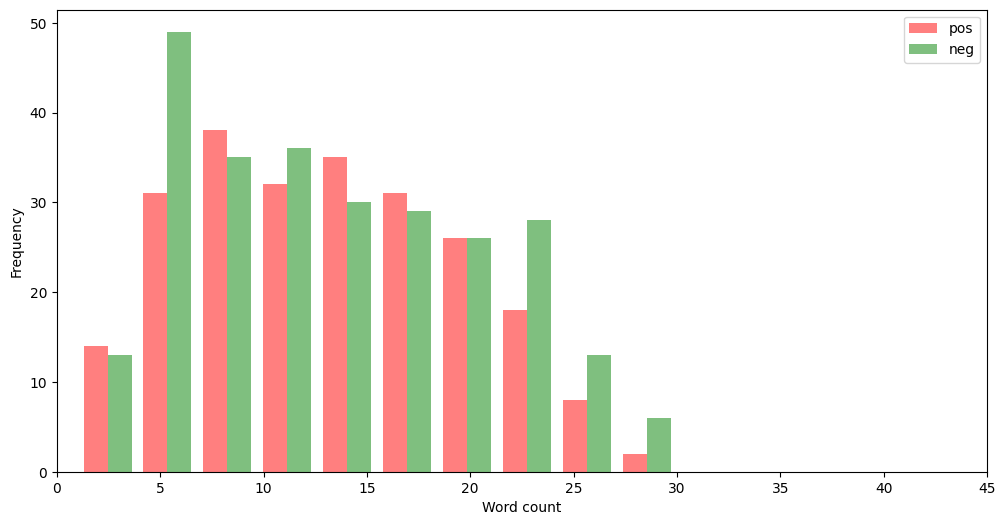

In [53]:
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]

plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['r', 'g'], alpha=0.5, label=['pos', 'neg'])
plt.legend(loc='upper right')

get the common words in training dataset

In [54]:
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        if(len(word)>2):
            all_words.append(word.lower())

Counter(all_words).most_common(20)

[('the', 169),
 ('and', 108),
 ('for', 72),
 ('have', 54),
 ('you', 51),
 ('that', 40),
 ('was', 38),
 ('but', 38),
 ('this', 34),
 ('just', 34),
 ("i'm", 29),
 ('with', 28),
 ('good', 26),
 ('not', 26),
 ('love', 24),
 ('all', 22),
 ('out', 21),
 ('still', 20),
 ('now', 20),
 ('going', 19)]

In [55]:
%matplotlib inline
sns.countplot(data['polarity'])

KeyError: 0

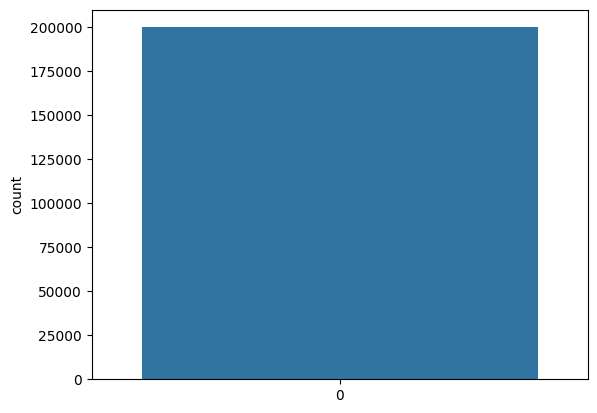

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'polarity' is in the DataFrame's columns
if 'polarity' in data.columns:
    sns.countplot(data['polarity'])
    plt.show()  # Display the plot
else:
    print("The 'polarity' column does not exist in the DataFrame.")

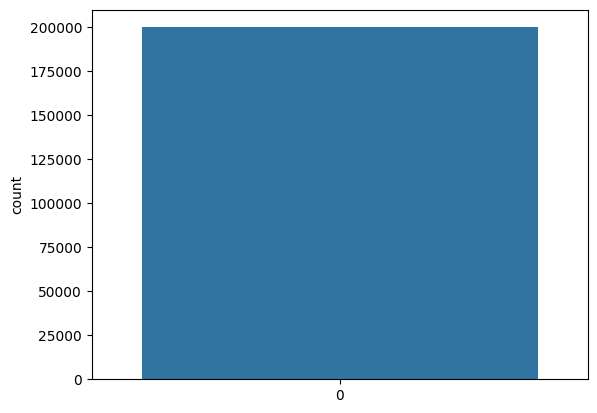

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'data' is a DataFrame
if isinstance(data, pd.DataFrame):
    # Check if 'polarity' is in the DataFrame's columns
    if 'polarity' in data.columns:
        sns.countplot(data['polarity'])
        plt.show()  # Display the plot
    else:
        print("The 'polarity' column does not exist in the DataFrame.")
else:
    print("'data' is not a DataFrame.")

In [56]:
print(data.head())  # Print the first few rows of the DataFrame

         polarity          id                          date     query  \
1040522         1  1956963525  Thu May 28 23:08:38 PDT 2009  NO_QUERY   
1167514         1  1980062217  Sun May 31 05:33:00 PDT 2009  NO_QUERY   
1387724         1  2052956768  Sat Jun 06 02:41:54 PDT 2009  NO_QUERY   
742220          0  2266484668  Sun Jun 21 08:35:19 PDT 2009  NO_QUERY   
363222          0  2047767126  Fri Jun 05 14:08:57 PDT 2009  NO_QUERY   

                    user                                               text  \
1040522     Beazacamille                      hot chocolate is truly great    
1167514        YaelBeeri              @kfirpravda no mac, me thinkpad girl    
1387724    andychapman09  Ooooh I love working in sales sometimes- had a...   
742220   teamoferforever  at ihop waiting to be called..we're #63..they'...   
363222            bigjim                      @berial yep, down for me too    

         word count  
1040522           5  
1167514           6  
1387724          14 

In [57]:
data.head()  # Print the first few rows of the DataFrame

polarity          id                          date     query  \
1040522         1  1956963525  Thu May 28 23:08:38 PDT 2009  NO_QUERY   
1167514         1  1980062217  Sun May 31 05:33:00 PDT 2009  NO_QUERY   
1387724         1  2052956768  Sat Jun 06 02:41:54 PDT 2009  NO_QUERY   
742220          0  2266484668  Sun Jun 21 08:35:19 PDT 2009  NO_QUERY   
363222          0  2047767126  Fri Jun 05 14:08:57 PDT 2009  NO_QUERY   

                    user                                               text  \
1040522     Beazacamille                      hot chocolate is truly great    
1167514        YaelBeeri              @kfirpravda no mac, me thinkpad girl    
1387724    andychapman09  Ooooh I love working in sales sometimes- had a...   
742220   teamoferforever  at ihop waiting to be called..we're #63..they'...   
363222            bigjim                      @berial yep, down for me too    

         word count  
1040522           5  
1167514           6  
1387724          14  
742220           18  
363222            6

In [58]:
data.tail()

polarity          id                          date     query  \
280346          0  1992026309  Mon Jun 01 08:04:27 PDT 2009  NO_QUERY   
1374562         1  2051457709  Fri Jun 05 22:04:25 PDT 2009  NO_QUERY   
1454269         1  2063307381  Sun Jun 07 02:08:18 PDT 2009  NO_QUERY   
170985          0  1963081315  Fri May 29 12:10:26 PDT 2009  NO_QUERY   
36095           0  1565533653  Mon Apr 20 06:59:02 PDT 2009  NO_QUERY   

                   user                                               text  \
280346              dda  @minimum12 Must be my writing then  22 years s...   
1374562  ShelbyCasanova  @dudeitsben of course I do. I won't be on a co...   
1454269         caturce  @officialTila tila  did u know u have a fan in...   
170985      FEASTSOFWAR  @XJakeXChaosX no  their playing in st.pete but...   
36095        hollowlegs  @Sweena How do I do that? The page won't load ...   

         word count  
280346           18  
1374562          14  
1454269          14  
170985           27  
36095            12

In [59]:
data.drop(['date', 'query', 'user', 'word count'], axis=1, inplace=True)

In [60]:
data.drop('id', axis=1, inplace=True)

In [61]:
data.head(10)

polarity                                               text
1040522         1                      hot chocolate is truly great 
1167514         1              @kfirpravda no mac, me thinkpad girl 
1387724         1  Ooooh I love working in sales sometimes- had a...
742220          0  at ihop waiting to be called..we're #63..they'...
363222          0                      @berial yep, down for me too 
49191           0  Loser. Im cold.  i don't like to be awake this...
410342          0                                     I MISS MY SON 
1068708         1  Just got back from River Watch and the water c...
1047412         1  spent a good night in Cardiff last night. Off ...
441047          0  I want to go to Sloans to watch the Apprentice...

In [62]:
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [63]:
data['text'] = data['text'].astype('str')

In [64]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'does', 'didn', "won't", 'wasn', "shan't", 'he', 'such', 'why', "should've", 'are', 'other', 'by', 'against', 'both', "didn't", 'won', 'that', 'very', "hadn't", 'below', 'only', 'needn', 'few', 'if', 'have', 'isn', 'm', 'no', 'your', 'yourself', 't', 'at', 've', 'when', 'now', 'ain', 'will', 'about', 'was', "you'll", "that'll", 'don', 'just', "weren't", 'weren', 'theirs', 'and', 'more', 'of', 'hadn', 'each', "shouldn't", 'out', 'this', 'how', 'can', 'themselves', "haven't", 'above', 'on', 'ours', "you'd", 'herself', 'be', 'than', "you're", 'under', 'did', 'is', 'so', 'off', "mustn't", 'who', "wasn't", 'over', 'y', 'where', 'were', 'itself', 'himself', 'having', 'its', "mightn't", 'but', "you've", 'all', 'him', 'same', 'these', 'shan', 'his', 'aren', 'has', 'yourselves', 'in', 're', 'not', 's', 'wouldn', 'our', 'we', 'a', 'do', 'because', 'there', 'couldn', 'haven', 'mustn', 'am', 'after', 'nor', "doesn't", 'her', 'the', 'before', 'down', "wouldn't", 'been', 'an', 'some', 'had', 'any',

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Muhammad
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Preprocessing:

Lower casting - each text is converted to lowercase

Removal of URL's, replaced by comma's

Removing usernames

Short words removing

Stopwords

Like lemmatization is the process of converting a word to its base

In [66]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\:)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
    # Lower Casting
    tweet = tweet.lower()
    tweet = tweet[1:]
    # Removing all URL's
    tweet = re.sub(urlPattern, '', tweet)
    # Removing all @username
    tweet = re.sub(userPattern, '', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans("","", string.punctuation))
    # tokenizing words
    tokens = word_tokenize(tweet)
    # Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    # Reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords = []
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

In [67]:
# Preprocess the text data before TF-IDF vectorization

data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text preprocessing is done')

Text preprocessing is done


In [68]:
data.head(20)

polarity                                               text  \
1040522         1                      hot chocolate is truly great    
1167514         1              @kfirpravda no mac, me thinkpad girl    
1387724         1  Ooooh I love working in sales sometimes- had a...   
742220          0  at ihop waiting to be called..we're #63..they'...   
363222          0                      @berial yep, down for me too    
49191           0  Loser. Im cold.  i don't like to be awake this...   
410342          0                                     I MISS MY SON    
1068708         1  Just got back from River Watch and the water c...   
1047412         1  spent a good night in Cardiff last night. Off ...   
441047          0  I want to go to Sloans to watch the Apprentice...   
649804          0                        Wish I was going to glasto    
1444595         1  @billybila which one? the pink or the purple? ...   
409205          0  I can't concentrate on writing the Geography E...   
883267          1         @SuperDunner Nps  Hope you had a good one!   
1293039         1                             @ComedyQueen byeeeeee    
940071          1  @MrsLard i'm glad you like it. sadly it does m...   
133594          0  No deaths of my party! game was challenging bu...   
1200598         1  @laylakayleigh looking fabulous!  but...your e...   
1581409         1  @tim_cooke i used to watch the big satellite w...   
1319874         1            Well glad I have a day without exams      

                                          processed_tweets  
1040522                           ot chocolate truly great  
1167514                       kfirpravda mac thinkpad girl  
1387724  oooh love working sale sometimes good one far ...  
742220   ihop waiting calledwere 63theyre 49 still isnt...  
363222                                          berial yep  
49191                   oser im cold dont like awake early  
410342                                            miss son  
1068708  ust got back river watch water cleaning system...  
1047412  pent good night cardiff last night work hottes...  
441047   want go sloans watch apprentice final enjoy co...  
649804                                    ish going glasto  
1444595  billybila one pink purple idk maybe good haha ...  
409205        cant concentrate writing geography exam note  
883267                        superdunner np hope good one  
1293039                               comedyqueen byeeeeee  
940071   mrslard im glad like sadly mean warped sense h...  
133594   death party game challenging fun feel bad kobo...  
1200598  laylakayleigh looking fabulous butyour eye tel...  
1581409  timcooke used watch big satellite world image ...  
1319874                          ell glad day without exam

Words from negative tweets

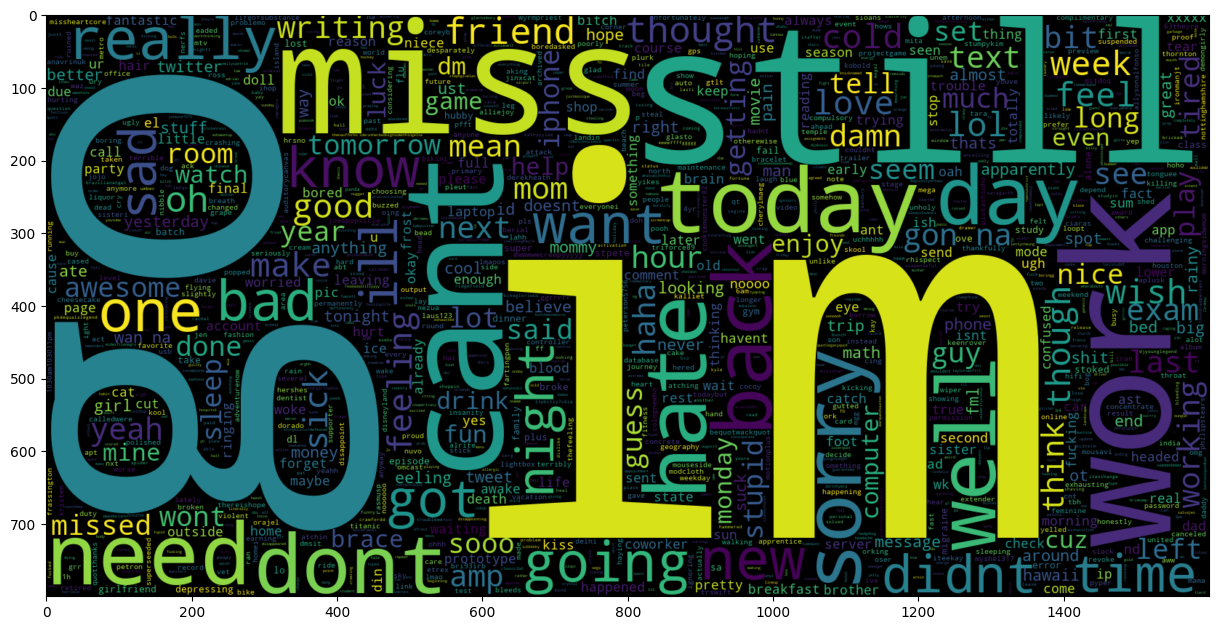

In [69]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc, interpolation='bilinear')

Words from positive tweets

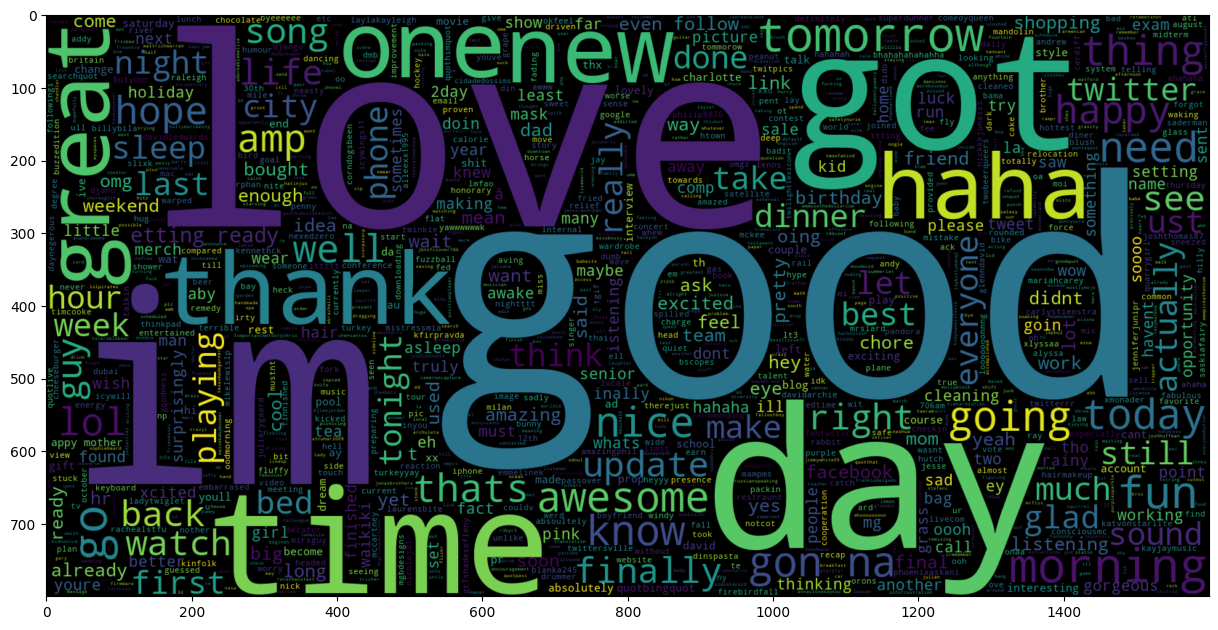

In [70]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc, interpolation='bilinear')

Vectorization and splitting the data like storing into input variable process tweets to X and output variable polarity to Y

In [71]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [72]:
print(X.shape)
print(y.shape)

(500,)
(500,)


Convert text to word frequency vector

tf to idf (which are the components of the resulting scores assigned to each word)

tf - how often a given word appears within a document

idf - this downscales a word that appear a lot across documents

Convert a collection of raw documents so a matrix of tf to idf features

In [73]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)

print(f'Vector fitted')
feature_names = vector.get_feature_names_out()
# print('no. of feature_words: ', len(vector.get_feature_names()))
print('No. of feature words:', len(feature_names))

Vector fitted
No. of feature words: 2085


In [74]:
print(X.shape)

(500, 2085)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [76]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print()
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (400, 2085)
y_train (400,)

X_test (100, 2085)
y_test (100,)


In [77]:
def model_Evaluate(model):
    # accuracy of model on training data
    acc_train = model.score(X_train, y_train)
    # accuracy of model on test data
    acc_test = model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}', format(acc_train*100))
    print('Accuracy of model on testing data : {}', format(acc_test*100))
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, cmap='Reds', fmt='',
               xticklabels=categories, yticklabels=categories)
    
    plt.xlabel('Predicted values', fontdict={'size':14}, labelpad=10)
    plt.ylabel('Actual values   ', fontdict={'size':14}, labelpad=10)
    plt.title ('Confusion Matrix', fontdict={'size':18}, pad=20)

Accuracy of model on training data : {} 98.5
Accuracy of model on testing data : {} 56.00000000000001
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        55
           1       0.51      0.40      0.45        45

    accuracy                           0.56       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.55      0.56      0.55       100



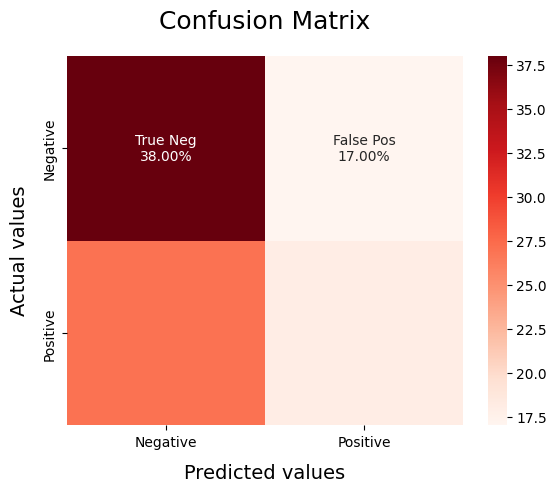

In [78]:
lg = LogisticRegression()
history = lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : {} 100.0
Accuracy of model on testing data : {} 57.99999999999999
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        55
           1       0.53      0.56      0.54        45

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



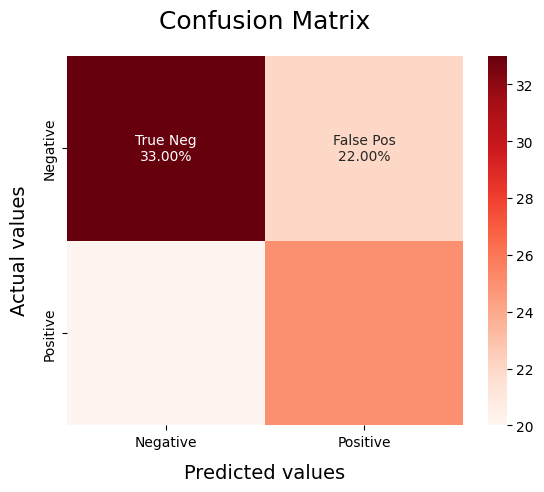

In [79]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : {} 95.0
Accuracy of model on testing data : {} 65.0
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        55
           1       0.65      0.49      0.56        45

    accuracy                           0.65       100
   macro avg       0.65      0.64      0.63       100
weighted avg       0.65      0.65      0.64       100



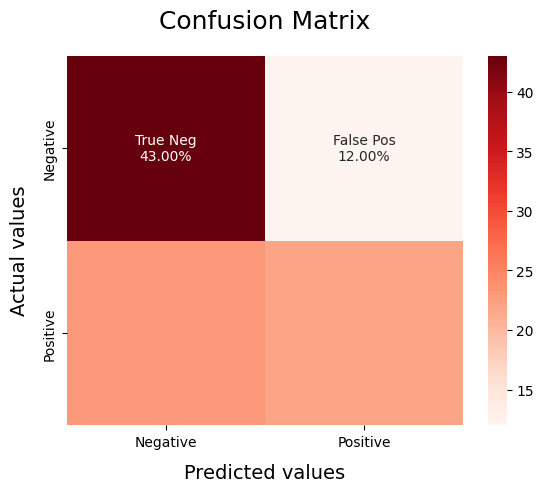

In [80]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : {} 97.75
Accuracy of model on testing data : {} 60.0
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        55
           1       0.57      0.47      0.51        45

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.59       100



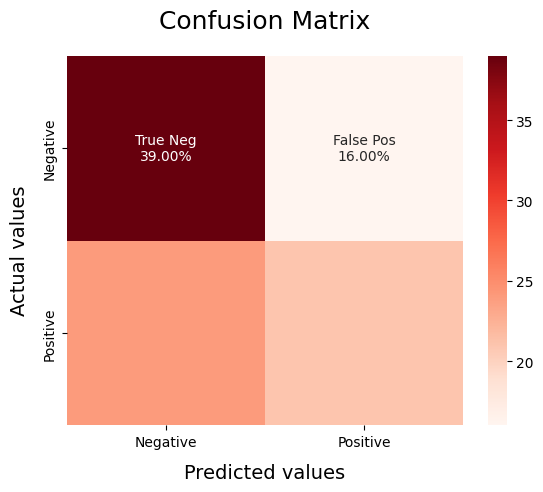

In [81]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN - LSTM

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
import re

In [83]:
import keras
keras.__version__

'2.14.0'

In [85]:
# Check the lengths of sequences
sequence_lengths = [len(seq) for seq in sequences]
print(sequence_lengths)

NameError: name 'sequences' is not defined

In [86]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
# print('sequences:', sequences)
# sequences = tf.sparse.reorder(tf.convert_to_tensor(sequences))

# Pad sequences
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)
print('Shape of tweets tensor:', tweets.shape)

[[   0    0    0 ...  520  271   26]
 [   0    0    0 ...  272  522  102]
 [   0    0    0 ...    8  276    9]
 ...
 [   0    0    0 ... 2086   18   54]
 [   0    0    0 ...  510  519   28]
 [   0    0    0 ...  200  115 2091]]
Shape of tweets tensor: (500, 200)


In [87]:
X_train, x_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

Model Evaluation

In [88]:
# pip install --upgrade tensorflow

In [89]:
sequence_lengths = [len(seq) for seq in sequences]
print(sequence_lengths)

[4, 4, 9, 10, 2, 7, 2, 13, 13, 15, 3, 13, 6, 5, 2, 11, 15, 12, 10, 5, 6, 8, 4, 2, 13, 8, 9, 7, 3, 12, 12, 11, 12, 2, 5, 4, 4, 8, 5, 9, 11, 7, 12, 5, 17, 6, 11, 14, 2, 2, 10, 9, 4, 3, 10, 12, 4, 6, 6, 8, 14, 14, 3, 13, 9, 10, 1, 7, 5, 8, 7, 4, 10, 11, 13, 14, 8, 9, 4, 9, 8, 7, 11, 12, 8, 5, 7, 2, 7, 6, 5, 5, 5, 13, 9, 3, 5, 2, 15, 7, 19, 6, 2, 5, 6, 2, 6, 5, 13, 7, 7, 12, 9, 9, 1, 3, 3, 6, 2, 14, 7, 3, 2, 3, 4, 6, 14, 8, 2, 14, 2, 3, 4, 14, 6, 8, 8, 8, 5, 12, 8, 6, 6, 7, 9, 4, 8, 7, 12, 6, 12, 9, 4, 6, 5, 2, 3, 13, 3, 5, 14, 5, 10, 4, 6, 11, 7, 4, 7, 4, 10, 4, 12, 3, 4, 3, 5, 10, 9, 8, 9, 11, 4, 15, 5, 11, 3, 6, 9, 12, 4, 11, 4, 3, 3, 7, 5, 5, 6, 10, 13, 11, 8, 12, 5, 7, 13, 6, 10, 6, 11, 9, 2, 2, 3, 4, 12, 4, 4, 3, 4, 10, 8, 2, 12, 12, 7, 2, 4, 9, 10, 10, 11, 13, 12, 12, 10, 10, 16, 7, 5, 6, 13, 7, 7, 12, 8, 7, 9, 15, 9, 3, 11, 3, 14, 3, 4, 5, 7, 14, 9, 13, 12, 8, 5, 13, 2, 12, 9, 4, 13, 11, 6, 9, 11, 9, 15, 5, 14, 8, 5, 6, 5, 8, 16, 4, 7, 4, 22, 6, 4, 4, 13, 4, 6, 3, 7, 3, 8, 7, 11, 2

In [90]:
import tensorflow as tf
import numpy as np
from scipy.sparse import csr_matrix

# Assuming you have already converted your data to CSR sparse format
# Convert your dense NumPy arrays to CSR sparse format
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Extract CSR matrix components
indices = X_train_sparse.indices
values = X_train_sparse.data
dense_shape = X_train_sparse.shape

# Transpose the indices
indices_transposed = np.array([[indices[i], values[i]] for i in range(len(indices))], dtype=np.float32)

# Create TensorFlow SparseTensor for X_train_sparse
X_train_sparse = tf.sparse.SparseTensor(
    indices=tf.constant(indices_transposed, dtype=tf.int64),
    values=tf.constant(values, dtype=tf.float32),
    dense_shape=tf.constant(dense_shape, dtype=tf.int64)
)

# Repeat the same process for X_test_sparse
indices = X_test_sparse.indices
values = X_test_sparse.data
dense_shape = X_test_sparse.shape

# Transpose the indices for X_test_sparse
indices_transposed = np.array([[indices[i], values[i]] for i in range(len(indices))], dtype=np.float32)

X_test_sparse = tf.sparse.SparseTensor(
    indices=tf.constant(indices_transposed, dtype=tf.int64),
    values=tf.constant(values, dtype=tf.float32),
    dense_shape=tf.constant(dense_shape, dtype=tf.int64)
)

print(X_train_sparse)
print(X_test_sparse)

SparseTensor(indices=tf.Tensor(
[[ 195  386]
 [ 196   23]
 [ 197  241]
 ...
 [ 199  553]
 [ 198 1629]
 [ 199   78]], shape=(3031, 2), dtype=int64), values=tf.Tensor([ 386.   23.  241. ...  553. 1629.   78.], shape=(3031,), dtype=float32), dense_shape=tf.Tensor([400 200], shape=(2,), dtype=int64))
SparseTensor(indices=tf.Tensor(
[[1077    0]
 [ 890    0]
 [2031    0]
 ...
 [ 451    0]
 [ 925    0]
 [ 709    0]], shape=(774, 2), dtype=int64), values=tf.Tensor(
[0.30580643 0.35577953 0.33366606 0.35577953 0.28745574 0.30580643
 0.35577953 0.2737494  0.23020004 0.33366606 0.44949284 0.42155463
 0.42155463 0.44949284 0.38635668 0.30203357 0.46360594 0.46360594
 0.46360594 0.39848745 0.34245375 0.2813214  0.70710677 0.70710677
 0.57735026 0.57735026 0.57735026 0.38415164 0.36027473 0.38415164
 0.38415164 0.36027473 0.36027473 0.2837629  0.29557994 0.3261879
 0.29152894 0.3261879  0.30591372 0.23259349 0.3261879  0.3261879
 0.3261879  0.30591372 0.19077918 0.23659581 0.22221105 0.37940392
 0.

# Training LSTM Model

In [91]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64, dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint('rnn_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_freq=1)
#history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint2])
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5000

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,890] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse] name: 

In [92]:
sequence = tokenizer.texts_to_sequences(['this data article is worst'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
    print('positive')
else:
    print('negative')

1/1 [==============================] - 0s 389ms/step
positive


In [93]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this ml course is best'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
    print('positive')
else:
    print('negative')

OSError: No file or directory found at rnn_model.hdf5

In [94]:
import pickle

file = open('vectoriser-pickle', 'wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle', 'wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle', 'wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle', 'wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle', 'wb')
pickle.dump(nb, file)
file.close()

In [95]:
def load_models():
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()

In [96]:
def predict(vectoriser, model, text):
    processes_text = [process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
     
    data = []
    for text, pred in zip(text, sentiment):
        data.append(text, pred)
        
    df = pd.DataFrame(data, columns = ['text', 'sentiment'])
    df = df.replace([0,1], ['Negative', 'Positive'])
    return df

In [97]:
if __name__ == "__main__":
    vectoriser, lg = load_models()
    
    text = ['i love machine learning', 'work is so hectic', 'John, i feel so good']
    
    df = predict(vectoriser, lg, text)
    print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'vectoriser.pickle'

In [98]:
if __name__ == "__main__":
    vectoriser, lg = load_models()
    
    text = ['i love machine learning', 'work is so hectic', 'John, i feel so bad']
    
    df = predict(vectoriser, lg, text)
    print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'vectoriser.pickle'